<a href="https://www.kaggle.com/ravi07bec/why-no-like-my-youtube-content-top-10-public-lb?scriptVersionId=89078667" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import pandas_profiling as pp

from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.model_selection import ShuffleSplit

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from pandas.api.types import is_string_dtype
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', 800)

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

%matplotlib inline
from scipy import stats
from scipy.stats import skew
from pandas.api.types import is_string_dtype

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression


# Read Datasets 

In [3]:
pd.set_option('max_colwidth', 800)
pd.set_option('display.max_columns', 500)
train_data=pd.read_parquet('/kaggle/input/kaggle-pog-series-s01e01/train.parquet')
test_data=pd.read_parquet('/kaggle/input/kaggle-pog-series-s01e01/test.parquet')
test_data['categoryId']=test_data['categoryId'].astype('str')


# Sample Data Preview 

In [4]:
train_data.head(2)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,target
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny videos|vlog|vlogging|NBA|browadis|challenges|bmw i8|faze rug|faze rug brother|mama rug and papa rug,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,"SUBSCRIBE to BRAWADIS ▶ http://bit.ly/SubscribeToBrawadis\r\rFOLLOW ME ON SOCIAL\r▶ Twitter: https://twitter.com/Brawadis\r▶ Instagram: https://www.instagram.com/brawadis/\r▶ Snapchat: brawadis\r\rHi! I’m Brandon Awadis and I like to make dope vlogs, pranks, reactions, challenges and basketball videos. Don’t forget to subscribe and come be a part of the BrawadSquad!",3C66w5Z0ixs_2020-08-12,NaN,True,0.103596
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “The Endorsement”,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12,Apex Legends|Apex Legends characters|new Apex Legend|Apex Legends Rampart|Apex Legends Season 6|Apex Legends Boosted|Battle Pass|Season 6 Battle Pass|Apex Legends new season|Apex Legends game|Respawn Apex Legends|Battle Royale game|Battle Royale|Battle Royale shooter|Apex Games|squad play|multiplayer shooter|Apex Legends PS4|Apex Legends Xbox|Apex Legends PC|Apex Legends Origin|Respawn Entertainment|Electronic Arts|Titanfall 2|fun battle royale,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Parekh (aka Rampart) built her rep in underground gauntlet circuits. But success has a way of making enemies. Good thing she knows how to use all those fancy weapons she’s upgraded… Apex Legends™ is a free-to-play battle royale game where legendary characters battle for glory, fame, and fortune on the fringes of the Frontier. Play for free now on Xbox One, PS4, and Origin for PC. Learn more about Apex Legends Season 6 – Boosted: http://x.ea.com/64060 Check out our YouTube channel: http://x.ea.com/56710.Follow us on Twitter: https://twitter.com/playapex.Follow us on Instagram: https://www.instagram.com/playapex/.#MeetRampart #ApexSeason6 #ApexSeasonSix #ApexLegends",M9Pmf9AB4Mo_2020-08-12,NaN,True,0.061611


# Baseline metric if Mean of Dependent variable is taken as Output 

In [5]:
baseline=train_data
baseline['baseline_mean_target']=baseline['target'].mean()
baseline['abs_error']=abs((baseline['target']-baseline['baseline_mean_target'])/baseline['baseline_mean_target'])

print('Mean Absolute Error Baseline is : ',round(baseline['abs_error'].mean(),2))
train_data.drop(['abs_error','baseline_mean_target'],axis=1,inplace=True)

Mean Absolute Error Baseline is :  0.52


# Data Distribution of Target Variable 

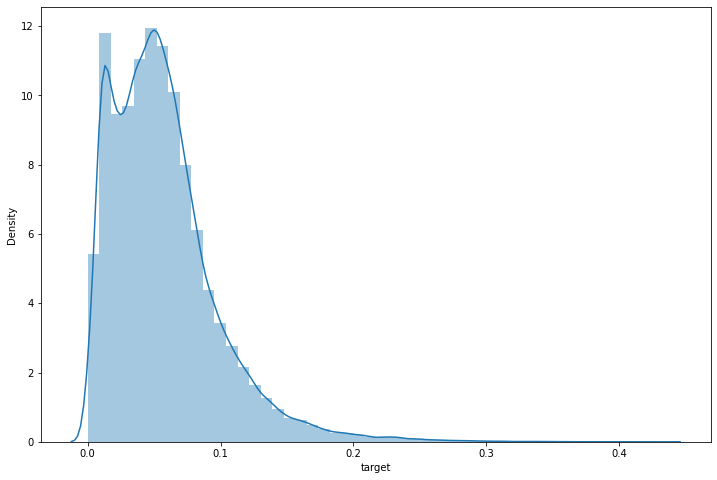

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(12, 8))
sns.distplot((train_data['target']));
plt.show()

In [7]:
print("Skewness:",train_data['target'].skew())
print("Kurtosis:",train_data['target'].kurt())

Skewness: 1.5628106842771023
Kurtosis: 4.415414078604201


Target looks like a Bi-Modal distribution(Right skewed and Long Tailed) with mean as 0.057, Median as 0.05 and highest ratio as 0.43


In [8]:
# Data Describe
display(train_data.describe())

,categoryId,view_count,likes,dislikes,comment_count,duration_seconds,target
count,92275.000000,9.227500e+04,9.227500e+04,92275.000000,9.227500e+04,90099.000000,92275.000000
mean,18.733416,2.779091e+06,1.521223e+05,3110.977307,1.373574e+04,760.614602,0.057060
std,6.866404,7.364113e+06,4.374777e+05,13342.743386,9.672682e+04,5816.818926,0.040373
min,1.000000,3.851000e+04,0.000000e+00,0.000000,0.000000e+00,3.000000,0.000000
25%,17.000000,5.312440e+05,2.136300e+04,368.000000,1.692000e+03,184.000000,0.028066
50%,20.000000,1.100045e+06,5.169200e+04,852.000000,3.856000e+03,446.000000,0.050784
75%,24.000000,2.482274e+06,1.312825e+05,2239.000000,9.322000e+03,854.000000,0.075265
max,29.000000,2.644074e+08,1.602153e+07,879354.000000,6.738537e+06,485620.000000,0.433503


# Missing Values Count

In [9]:
total=train_data.isnull().sum().sort_values(ascending=False)
percent=100*(train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head()

,Total,Percent
duration_seconds,2176,2.358169
description,1476,1.599567
video_id,0,0.000000
title,0,0.000000
has_thumbnail,0,0.000000


Very few columns has Missing data with duration not available for 2.3% of Videos

# Correlation Plot of Likes/Views against other variables 

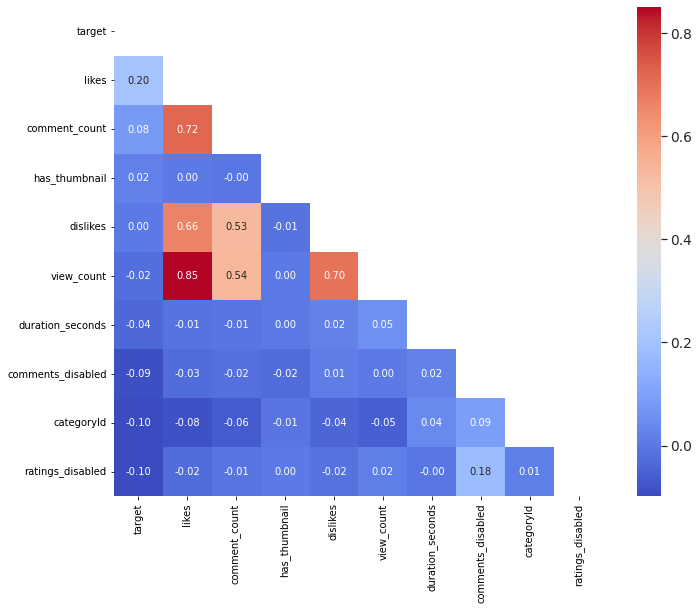

In [10]:
k = 10 #number of variables for heatmap
f, ax = plt.subplots(figsize=(12, 9))

corrM = train_data.corr()
cols = corrM.nlargest(k, 'target')['target'].index

matrix = np.triu(train_data[cols].corr())

cm = np.triu(train_data[cols].corr())
sns.set(font_scale=1.25)
hm = sns.heatmap(train_data[cols].corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,cmap='coolwarm',mask=matrix)
plt.show()

Likes has high correlation with target but thats expected as it is numerator in output 

If Ratings and Comments are disabled, people tend to like less and possibly content creators are disabling comments and ratings for clickbait titles 

# Missing Value Imputation 

In [11]:
train_data['duration_seconds']=train_data['duration_seconds'].fillna(train_data['duration_seconds'].median())
total=train_data.isnull().sum().sort_values(ascending=False)
percent=100*(train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head()

,Total,Percent
description,1476,1.599567
video_id,0,0.000000
title,0,0.000000
has_thumbnail,0,0.000000
duration_seconds,0,0.000000


# Feature Engineering 

In [12]:
import re
train_data['publishedAt']=pd.to_datetime(train_data['publishedAt'])
train_data['publishedYear']=train_data['publishedAt'].dt.year
train_data['publishedMonth']=train_data['publishedAt'].dt.month
train_data['publishedWeek']=train_data['publishedAt'].dt.week
train_data['publishedWeekDay']=train_data['publishedAt'].dt.day_name()


frequencies=train_data['channelTitle'].value_counts()
mapping=train_data['channelTitle'].map(frequencies)
train_data['titleTop']=train_data['channelTitle'].mask(mapping<3,'Other')
train_data['titleTop']=np.where(train_data['titleTop'].isin(test_data['channelTitle'].unique().tolist()),train_data['titleTop'],'Other')

mapping=train_data['video_id'].map(frequencies)
train_data['videoTop']=train_data['video_id'].mask(mapping<3,'Other')
train_data['videoTop']=np.where(train_data['videoTop'].isin(test_data['video_id'].unique().tolist()),train_data['videoTop'],'Other')

train_data['videoTarget']=train_data.groupby(['videoTop'])['target'].transform('mean')

train_data['categoryId']=train_data['categoryId'].astype('str')

train_data['categoryId']=np.where(train_data['categoryId'].isin(test_data['categoryId'].unique().tolist()),train_data['categoryId'],'Other')

train_data['categoryIdViews']=np.sqrt(train_data.groupby('categoryId')['view_count'].transform('median'))
train_data['categoryIdLikes']=np.sqrt(train_data.groupby('categoryId')['likes'].transform('median'))
train_data['categoryIdTarget']=np.sqrt(train_data.groupby('categoryId')['target'].transform('median'))


train_data['trending_date']=pd.to_datetime(train_data['trending_date'])
train_data['trendingMonth']=train_data['trending_date'].dt.month
train_data['trendingWeek']=train_data['trending_date'].dt.week
train_data['trendingWeekDay']=train_data['trending_date'].dt.day_name()


train_data['trendingDaysLag'] = (train_data['trending_date'].dt.date - train_data['publishedAt'].dt.date).dt.days

train_data['channelLikesAvg']=np.sqrt(train_data.groupby('titleTop')['likes'].transform('median'))
train_data['channelCommentAvg']=np.sqrt(train_data.groupby('titleTop')['comment_count'].transform('median'))
train_data['channelDislikesAvg']=np.sqrt(train_data.groupby('titleTop')['dislikes'].transform('median'))
train_data['channelTargetAvg']=np.sqrt(train_data.groupby('titleTop')['target'].transform('median'))


train_data=train_data.sort_values(by=['video_id','trending_date'])
train_data['lagTarget']=train_data.groupby(['titleTop'])['target'].shift(1)
train_data['lagTarget']=train_data['lagTarget'].fillna(train_data['channelTargetAvg'])


train_data['numWordsTitle'] = train_data['title'].str.count(' ') + 1
train_data['numCharsTitle'] = train_data['title'].str.count('') + 1
train_data['numCharsDescription'] = train_data['description'].str.count(' ') + 1

train_data['numTags'] = train_data['tags'].apply(lambda x:len(x.split('|')))
train_data['numTagsBucket']=pd.cut(train_data['numTags'],bins=[0,10,20,40,60,10000],labels=['tagsLT10','tags:11-20',
      
                                                                                            'tags:21-40','tags:41-60','tagsGT60'])

train_data['durationBins']=pd.cut(train_data['duration_seconds'],bins=[0,60,120,300,600,1800,100000000],labels=['durationLT60','duration:61-120','duration:121-300','duration:301-600','duration:601-1800','durationGT1800'])
train_data['durationSQRT']=np.sqrt(train_data['duration_seconds'])

train_data['titleNumberCount']=train_data['title'].apply(lambda x:len(re.findall('[0-9]+', x)))
train_data['trendingCount']=train_data.groupby(['video_id']).cumcount()+1

train_data['Non_Alphanumeric'] = train_data['title'].str.findall(r'[^a-zA-Z0-9 ]').str.len()
train_data['Official_Vid'] = train_data['title'].apply(lambda x: 'Official' if 'Official' in x else 'Non_Official')


train_data.head(2)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,target,publishedYear,publishedMonth,publishedWeek,publishedWeekDay,titleTop,videoTop,videoTarget,categoryIdViews,categoryIdLikes,categoryIdTarget,trendingMonth,trendingWeek,trendingWeekDay,trendingDaysLag,channelLikesAvg,channelCommentAvg,channelDislikesAvg,channelTargetAvg,lagTarget,numWordsTitle,numCharsTitle,numCharsDescription,numTags,numTagsBucket,durationBins,durationSQRT,titleNumberCount,trendingCount,Non_Alphanumeric,Official_Vid
58225,--14w5SOEUs,Migos - Avalanche,2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,2021-06-11,Migos|Avalanche|Quality|Control|Music/Motown|Records|Hip|Hop,1076217,122830,867,9539,https://i.ytimg.com/vi/--14w5SOEUs/default.jpg,False,False,"Music video by Migos performing Avalanche. Quality Control Music/Motown Records; © 2021 Quality Control Music, LLC, under exclusive license to UMG Recordings, Inc.http://vevo.ly/71eTSO",--14w5SOEUs_2021-06-11,239.0,True,0.114131,2021,6,23,Thursday,Other,Other,0.057056,1236.258873,309.707927,0.250923,6,23,Friday,1,208.681576,56.947344,27.0,0.223229,0.223229,3,19,23.0,8,tagsLT10,duration:121-300,15.459625,0,1,1,Non_Official
58434,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,2021-06-12,Migos|Avalanche|Quality|Control|Music/Motown|Records|Hip|Hop,3317372,202153,2518,14721,https://i.ytimg.com/vi/--14w5SOEUs/default.jpg,False,False,"Watch the the official video for Migos - AvalancheStream//Download Migos new album Culture III here:https://QualityControl.lnk.to/CultureIIIFollow Migos on socials:https://instagram.com/migoshttps://facebook.com/THEMigosAtlhttps://twitter.com/migosMigos Avalanche Lyrics:[Verse: Quavo]Poppa was a rolling stone, but now I got rolling stones in the bezel (ice)Momma at home all alone, hustling trying to keep this shit together (momma)Young n***a smoking on gas, I’m living too fast, my foot on the pedal (whoo)If I got back to the past, my n***as ain’t know we’d be rockin’ Coachella (hey)If a n***a ever try me or play me, I buy him an iced out shovel (ice)Dig ya own grave n***a, you played yourself, I put some cash on your schedule (you played yourself)If a bitch ever try to filet me huh, I ...",--14w5SOEUs_2021-06-12,239.0,True,0.060938,2021,6,23,Thursday,Other,Other,0.057056,1236.258873,309.707927,0.250923,6,23,Saturday,2,208.681576,56.947344,27.0,0.223229,0.114131,5,36,801.0,8,tagsLT10,duration:121-300,15.459625,0,2,3,Official


# Added Features to reflect target variable 


# For Target EDA with input numeric features 

In [13]:
# num_features=['duration_seconds','trendingDaysLag','channelLikesAvg','channelCommentAvg',
#                'channelDislikesAvg','numWordsTitle','numTags','numCharsTitle']


# fig,axes = plt.subplots(2,4,figsize=(18,15))
# for seg,col in enumerate(num_features[:len(num_features)-1]):
    
#     x,y = seg//4,seg%4
#     sns.regplot(x=col, y='target' ,data=train_data,ax=axes[x][y],color='g')

In [14]:
cat_columns=['categoryId','comments_disabled','ratings_disabled','has_thumbnail','durationBins','trendingCount','publishedWeekDay','Official_Vid']
for i in cat_columns:
    print('Target Difference for :',i)
    test1=train_data.groupby([i])['target'].mean().reset_index()
    print(test1)
    print('-'*10, '\n')

Target Difference for : categoryId
   categoryId    target
0           1  0.062568
1          10  0.075645
2          17  0.021383
3          19  0.054457
4           2  0.047023
5          20  0.057422
6          22  0.066979
7          23  0.082427
8          24  0.055534
9          25  0.014093
10         26  0.061377
11         27  0.067125
12         28  0.046514
13      Other  0.061567
---------- 

Target Difference for : comments_disabled
   comments_disabled    target
0              False  0.057524
1               True  0.028954
---------- 

Target Difference for : ratings_disabled
   ratings_disabled    target
0             False  0.057336
1              True  0.000000
---------- 

Target Difference for : has_thumbnail
   has_thumbnail    target
0          False  0.054972
1           True  0.057357
---------- 

Target Difference for : durationBins
        durationBins    target
0       durationLT60  0.068078
1    duration:61-120  0.049841
2   duration:121-300  0.061765
3   dur

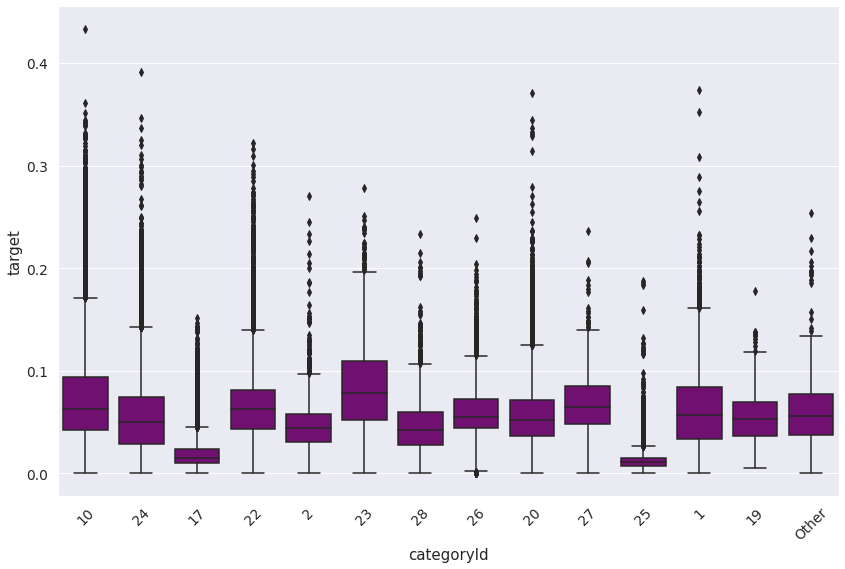

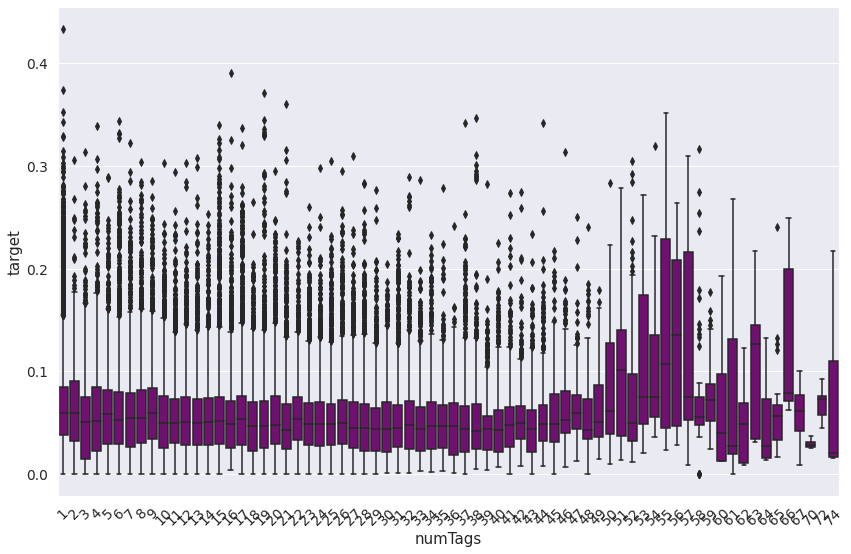

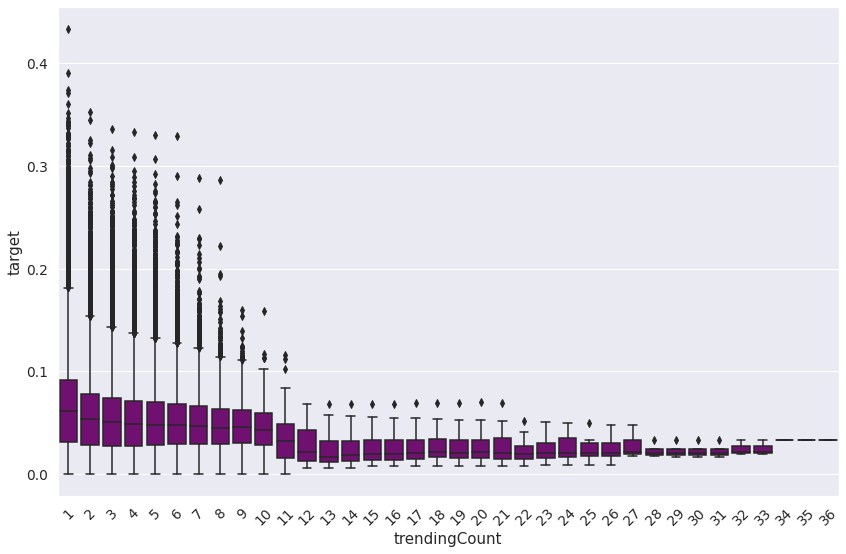

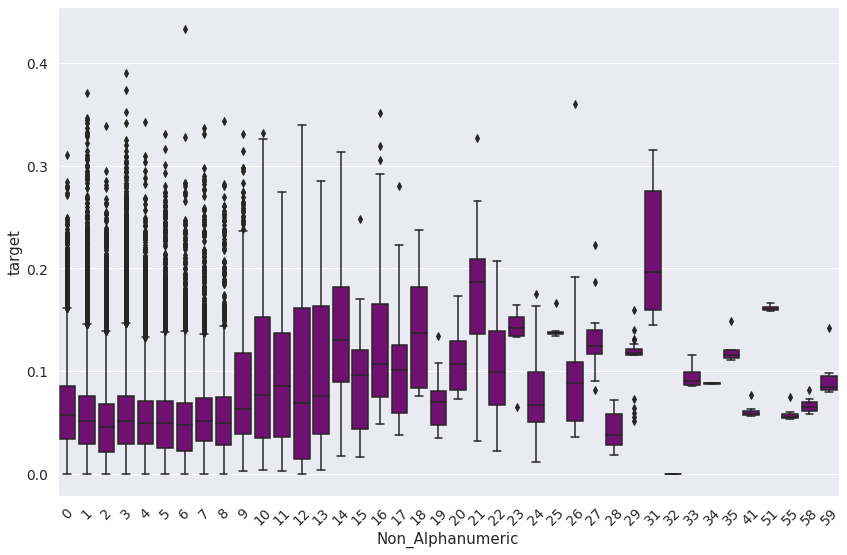

In [15]:
# Tags Box Plot 
cat_columns2=['categoryId','numTags','trendingCount','Non_Alphanumeric']

for i in cat_columns2:
    f, ax = plt.subplots(figsize=(14, 9))

    fig=sns.boxplot(x=i, y="target", data=train_data,color='purple')
    fig.set_xticklabels(fig.get_xticklabels(), rotation=45)
    None

For Higher number of Tags, the target variable increases, Sweet spot is 50-60 tags


In [16]:
model_features=['categoryId', 'comments_disabled',
       'ratings_disabled','duration_seconds','has_thumbnail','publishedYear','trendingDaysLag','channelLikesAvg','channelCommentAvg',
               'channelDislikesAvg','channelTargetAvg','numWordsTitle','numTags','numTagsBucket','publishedMonth','publishedWeek','numCharsTitle','numCharsDescription',
               'categoryIdViews','categoryIdLikes','titleNumberCount','durationBins','durationSQRT','publishedWeekDay','trendingMonth','trendingWeek','trendingCount','categoryIdTarget','Non_Alphanumeric','Official_Vid','videoTarget']


y=train_data['target']
data_x=train_data[model_features]

#Missing Value Imputation in Train Data

data_x['numCharsDescription']=data_x['numCharsDescription'].fillna(0)
        
data_x=pd.get_dummies(data_x)



        
        
data_x.head(2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,comments_disabled,ratings_disabled,duration_seconds,has_thumbnail,publishedYear,trendingDaysLag,channelLikesAvg,channelCommentAvg,channelDislikesAvg,channelTargetAvg,numWordsTitle,numTags,publishedMonth,publishedWeek,numCharsTitle,numCharsDescription,categoryIdViews,categoryIdLikes,titleNumberCount,durationSQRT,trendingMonth,trendingWeek,trendingCount,categoryIdTarget,Non_Alphanumeric,videoTarget,categoryId_1,categoryId_10,categoryId_17,categoryId_19,categoryId_2,categoryId_20,categoryId_22,categoryId_23,categoryId_24,categoryId_25,categoryId_26,categoryId_27,categoryId_28,categoryId_Other,numTagsBucket_tagsLT10,numTagsBucket_tags:11-20,numTagsBucket_tags:21-40,numTagsBucket_tags:41-60,numTagsBucket_tagsGT60,durationBins_durationLT60,durationBins_duration:61-120,durationBins_duration:121-300,durationBins_duration:301-600,durationBins_duration:601-1800,durationBins_durationGT1800,publishedWeekDay_Friday,publishedWeekDay_Monday,publishedWeekDay_Saturday,publishedWeekDay_Sunday,publishedWeekDay_Thursday,publishedWeekDay_Tuesday,publishedWeekDay_Wednesday,Official_Vid_Non_Official,Official_Vid_Official
58225,False,False,239.0,True,2021,1,208.681576,56.947344,27.0,0.223229,3,8,6,23,19,23.0,1236.258873,309.707927,0,15.459625,6,23,1,0.250923,1,0.057056,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
58434,False,False,239.0,True,2021,2,208.681576,56.947344,27.0,0.223229,5,8,6,23,36,801.0,1236.258873,309.707927,0,15.459625,6,23,2,0.250923,3,0.057056,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In earlier model iterations, we found large delta between training and test MAE. This is primarily due to absence of features(Channel,CategoryID etc in test dataset)


# For Building Test Datasets 

In [17]:
channelData=train_data[['titleTop','channelLikesAvg', 'channelCommentAvg',
       'channelDislikesAvg', 'channelTargetAvg']].drop_duplicates()
categoryData=train_data[['categoryId','categoryIdViews', 'categoryIdLikes','categoryIdTarget']].drop_duplicates()

test_data2=test_data.merge(channelData,left_on=['channelTitle'],right_on=['titleTop'],how='left')
test_data2=test_data2.merge(train_data[['channelId','lagTarget']].drop_duplicates(subset=['channelId'],keep='last'),on='channelId',how='left')

test_data2=test_data2.merge(categoryData,on='categoryId',how='left')

test_data2['publishedAt']=pd.to_datetime(test_data2['publishedAt'])
test_data2['publishedYear']=test_data2['publishedAt'].dt.year
test_data2['publishedMonth']=test_data2['publishedAt'].dt.month
test_data2['publishedWeek']=test_data2['publishedAt'].dt.week
test_data2['publishedWeekDay']=test_data2['publishedAt'].dt.day_name()




test_data2['trending_date']=pd.to_datetime(test_data2['trending_date'])
test_data2['trendingMonth']=test_data2['trending_date'].dt.month
test_data2['trendingWeek']=test_data2['trending_date'].dt.week
test_data2['trendingWeekDay']=test_data2['trending_date'].dt.day_name()

test_data2['trendingDaysLag'] = (test_data2['trending_date'].dt.date - test_data2['publishedAt'].dt.date).dt.days

test_data2['numWordsTitle'] = test_data2['title'].str.count(' ') + 1
test_data2['numCharsTitle'] = test_data2['title'].str.count('') + 1
test_data2['numCharsDescription'] = test_data2['description'].str.count(' ') + 1

test_data2['numTags'] = test_data2['tags'].apply(lambda x:len(x.split('|')))
test_data2['numTagsBucket']=pd.cut(test_data2['numTags'],bins=[0,10,20,40,60,10000],labels=['tagsLT10','tags:11-20',
      
                                                                                            'tags:21-40','tags:41-60','tagsGT60'])

test_data2['titleNumberCount']=test_data2['title'].apply(lambda x:len(re.findall('[0-9]+', x)))

test_data2['durationBins']=pd.cut(test_data2['duration_seconds'],bins=[0,60,120,300,600,1800,100000000],labels=['durationLT60','duration:61-120','duration:121-300','duration:301-600','duration:601-1800','durationGT1800'])
test_data2['durationSQRT']=np.sqrt(test_data2['duration_seconds'])
trending_data=train_data[['video_id','trendingCount']].sort_values(by='trendingCount').drop_duplicates(subset='video_id',keep='last')
test_data2=test_data2.merge(trending_data,how='left')
test_data2['trendingCount2']=test_data2.groupby(['video_id']).cumcount()+1
test_data2['trendingCount']=np.where(test_data2['trendingCount'].isnull(),test_data2['trendingCount2'],test_data2['trendingCount2']+test_data2['trendingCount'])

videoData=train_data[['video_id','videoTarget']].drop_duplicates()
test_data2=test_data2.merge(videoData,left_on=['video_id'],right_on=['video_id'],how='left')



test_data2['Non_Alphanumeric'] = test_data2['title'].str.findall(r'[^a-zA-Z0-9 ]').str.len()
test_data2['Official_Vid'] = test_data2['title'].apply(lambda x: 'Official' if 'Official' in x else 'Non_Official')


data_test=test_data2[model_features]
data_test=pd.get_dummies(data_test)

#Missing Value Imputation in Test Data
cols=data_test.columns

for i in cols:
    if(is_string_dtype(data_test[i])):
        data_test[i]=data_test[i].fillna(data_test[i].mode()[0])
    else:
        data_test[i]=data_test[i].fillna(data_test[i].mean())
        
data_test.head(2)

,comments_disabled,ratings_disabled,duration_seconds,has_thumbnail,publishedYear,trendingDaysLag,channelLikesAvg,channelCommentAvg,channelDislikesAvg,channelTargetAvg,numWordsTitle,numTags,publishedMonth,publishedWeek,numCharsTitle,numCharsDescription,categoryIdViews,categoryIdLikes,titleNumberCount,durationSQRT,trendingMonth,trendingWeek,trendingCount,categoryIdTarget,Non_Alphanumeric,videoTarget,categoryId_1,categoryId_10,categoryId_17,categoryId_19,categoryId_2,categoryId_20,categoryId_22,categoryId_23,categoryId_24,categoryId_25,categoryId_26,categoryId_27,categoryId_28,numTagsBucket_tagsLT10,numTagsBucket_tags:11-20,numTagsBucket_tags:21-40,numTagsBucket_tags:41-60,numTagsBucket_tagsGT60,durationBins_durationLT60,durationBins_duration:61-120,durationBins_duration:121-300,durationBins_duration:301-600,durationBins_duration:601-1800,durationBins_durationGT1800,publishedWeekDay_Friday,publishedWeekDay_Monday,publishedWeekDay_Saturday,publishedWeekDay_Sunday,publishedWeekDay_Thursday,publishedWeekDay_Tuesday,publishedWeekDay_Wednesday,Official_Vid_Non_Official,Official_Vid_Official
0,False,False,1335.0,True,2021,1,374.501001,75.564542,34.547069,0.269768,10,21,11,48,61,159.0,1072.411069,233.857863,0,36.537652,12,48,1.0,0.224039,3,0.060388,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,False,False,28.0,True,2021,2,304.740841,76.619093,37.839483,0.228524,5,1,11,48,32,16.0,981.049948,262.796499,0,5.291503,12,48,1.0,0.279778,0,0.060388,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0


# Aligning Train and test datasets to have same schema and account for missing categories

In [18]:
train_data_final, test_data_final = data_x.align(data_test, join = 'inner', axis = 1)

In [19]:
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import cross_val_predict

def my_custom_loss_func(y_true, y_pred):
    diff = np.abs((y_pred*y_pred - y_true*y_true)/y_pred*y_pred)
    return -np.mean(diff)

score1 = make_scorer(my_custom_loss_func, greater_is_better=False)

score2=['neg_mean_absolute_error']


models=[LinearRegression(),DecisionTreeRegressor(max_depth=4),XGBRegressor(eta=0.05,max_depth=8,subsample=0.5,colsample_bytree=0.5)]
labels=['Linear_Regression','Decision_Tree','XGBoost']




performance_final=pd.DataFrame()
for i in range(0,len(models)):
    print('Running Model:',labels[i])
    model=models[i]
    cv_results = cross_validate(model, train_data_final, np.sqrt(y), cv  = 5,return_train_score=True,scoring=score1)
    
    
    metrics=pd.DataFrame(cv_results).mean().reset_index()
    metrics['model_name']=labels[i]
    performance=pd.DataFrame(metrics.pivot_table(index='model_name',columns='index', values=0).to_records())
    
    performance_final=performance_final.append(performance)
    


Running Model: Linear_Regression
Running Model: Decision_Tree
Running Model: XGBoost


In [20]:
performance_final

,model_name,fit_time,score_time,test_score,train_score
0,Linear_Regression,0.810421,0.173771,0.020540,0.020475
0,Decision_Tree,0.921373,0.125261,0.021910,0.021751
0,XGBoost,11.166455,0.162414,0.018068,0.015923


In [21]:
# eval_metric_model='test_score'
# performance_final[eval_metric_model]= round(performance_final[eval_metric_model],3)
# performance_final=performance_final.sort_values(by=[eval_metric_model],ascending=False)
# px.bar(performance_final,x='model_name',y=eval_metric_model,text=eval_metric_model)

In [22]:
# Feature Importance
import difflib
model=XGBRegressor(eta=0.05,max_depth=8,subsample=0.5,colsample_bytree=0.5)
model.fit(train_data_final, np.sqrt(y))
fi = pd.DataFrame({'feature': list(train_data_final.columns),
                   'importance': 100*model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi.head(20)

,feature,importance
17,categoryIdLikes,19.145279
1,ratings_disabled,11.413896
23,categoryIdTarget,8.575782
35,categoryId_25,6.279000
9,channelTargetAvg,6.264550
28,categoryId_17,6.244115
33,categoryId_23,2.616588
27,categoryId_10,2.311529
5,trendingDaysLag,2.290112
36,categoryId_26,2.015663


# Inference on test data for submission

In [23]:
models=[LinearRegression(),DecisionTreeRegressor(max_depth=4),XGBRegressor(eta=0.05,max_depth=8,subsample=0.5,colsample_bytree=0.5)]
labels=['Linear_Regression','Decision_Tree','XGBoost']

models=[XGBRegressor(eta=0.05,max_depth=8,subsample=0.5,colsample_bytree=0.5)]
labels=['XGBoost']
final_pred=pd.DataFrame()
i=0
for model in models:
    print(labels[i])
    model.fit(train_data_final, np.sqrt(y))
    predictions=pd.DataFrame(model.predict(test_data_final))
    predictions=pd.concat([test_data[['id']],predictions],axis=1)
    predictions['pred']=predictions[0]*predictions[0]
    predictions['model']=labels[i]
    final_pred=final_pred.append(predictions)
    i=i+1
    
    
    
    

XGBoost


In [24]:
final_pred['target']=final_pred.groupby(['id'])['pred'].transform('mean')
test=final_pred[['id','target']].drop_duplicates().dropna()
#Superimposing target as 0 for disabled ratings
test['target'][test_data_final[test_data_final['ratings_disabled']==True].index.tolist()]=0
test.to_csv('submission.csv', index = False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [25]:
test

,id,target
0,_wNsZEqpKUA_2021-12-01,0.082972
1,2jfbXZiE6Lc_2021-12-01,0.081862
2,F1Hq8eVOMHs_2021-12-01,0.091901
3,GQXVQmcGQUY_2021-12-01,0.028806
4,n4XojTb6pfs_2021-12-01,0.098511
...,...,...
5795,hJfpCXAMYPM_2021-12-30,0.061177
5796,MbmTMEYnEzo_2021-12-30,0.054907
5797,VG7arSAYvQI_2021-12-30,0.062652
5798,SNb-g-hNYYs_2021-12-30,0.065863


In [26]:
# final=pd.concat([test_data[['id']],pd.DataFrame(model.predict(test_data_final))],axis=1)
# final['target']=final[0]*final[0]
# final=final.drop([0],axis=1)
# final.to_csv('submission1_baseline.csv', index = False)

In [27]:
# Learnings with time 

## V1 Model with no feature engineering gives a MAE of 0.025 which is ranked 56/67 entries 
